# MUSHROOM CLASSIFICATION

# 1.Describing the data

 deatils Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

# 2.EDA

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df=pd.read_csv("mushrooms.csv")

In [134]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
class,p,e,e,p,e,e,e,e,p,e
cap-shape,x,x,b,x,x,x,b,b,x,b
cap-surface,s,s,s,y,s,y,s,y,y,s
cap-color,n,y,w,w,g,y,w,w,w,y
bruises,t,t,t,t,f,t,t,t,t,t
odor,p,a,l,p,n,a,a,l,p,a
gill-attachment,f,f,f,f,f,f,f,f,f,f
gill-spacing,c,c,c,c,w,c,c,c,c,c
gill-size,n,b,b,n,b,b,b,b,n,b
gill-color,k,k,n,n,k,n,g,n,p,g


In [101]:
df.shape

(8124, 23)

In [102]:
df.isnull().sum()   # finding missing data 


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [103]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [104]:
df.duplicated().sum()  # finding duplicated columns

0

In [130]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [107]:
df['class'].value_counts()  #checking is that data is unbiased data or not

e    4208
p    3916
Name: class, dtype: int64

__________________________________________________

column index 0 feature name: class
it has 2 values and they are ['p' 'e'] and their counts of values in columns are
e    4208
p    3916
Name: class, dtype: int64


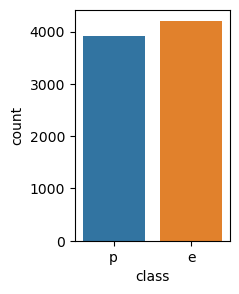


__________________________________________________

column index 1 feature name: cap-shape
it has 6 values and they are ['x' 'b' 's' 'f' 'k' 'c'] and their counts of values in columns are
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64


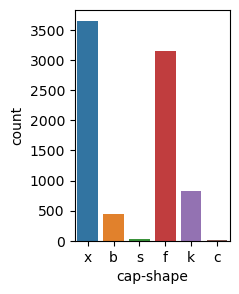


__________________________________________________

column index 2 feature name: cap-surface
it has 4 values and they are ['s' 'y' 'f' 'g'] and their counts of values in columns are
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64


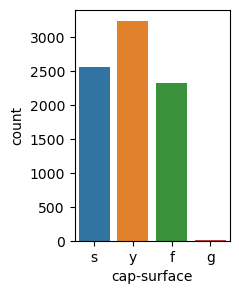


__________________________________________________

column index 3 feature name: cap-color
it has 10 values and they are ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r'] and their counts of values in columns are
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64


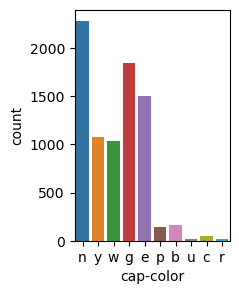


__________________________________________________

column index 4 feature name: bruises
it has 2 values and they are ['t' 'f'] and their counts of values in columns are
f    4748
t    3376
Name: bruises, dtype: int64


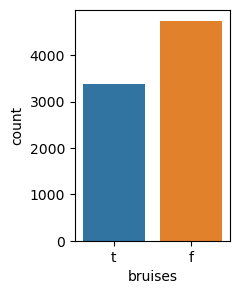


__________________________________________________

column index 5 feature name: odor
it has 9 values and they are ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm'] and their counts of values in columns are
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64


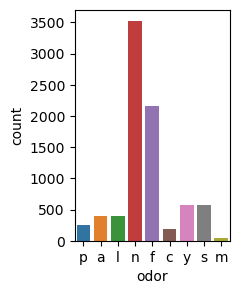


__________________________________________________

column index 6 feature name: gill-attachment
it has 2 values and they are ['f' 'a'] and their counts of values in columns are
f    7914
a     210
Name: gill-attachment, dtype: int64


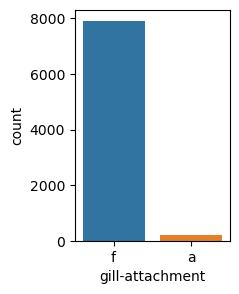


__________________________________________________

column index 7 feature name: gill-spacing
it has 2 values and they are ['c' 'w'] and their counts of values in columns are
c    6812
w    1312
Name: gill-spacing, dtype: int64


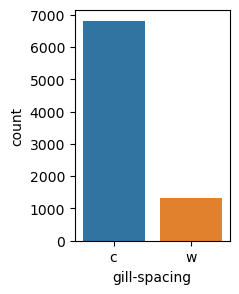


__________________________________________________

column index 8 feature name: gill-size
it has 2 values and they are ['n' 'b'] and their counts of values in columns are
b    5612
n    2512
Name: gill-size, dtype: int64


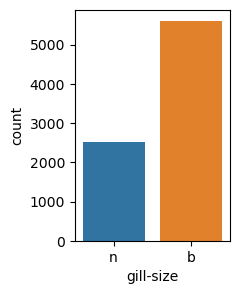


__________________________________________________

column index 9 feature name: gill-color
it has 12 values and they are ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o'] and their counts of values in columns are
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64


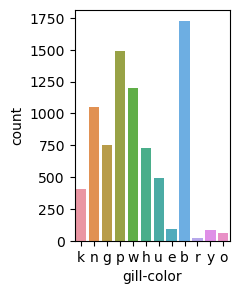


__________________________________________________

column index 10 feature name: stalk-shape
it has 2 values and they are ['e' 't'] and their counts of values in columns are
t    4608
e    3516
Name: stalk-shape, dtype: int64


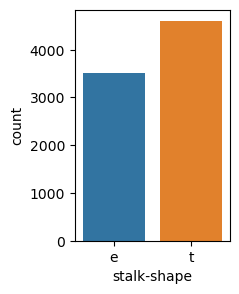


__________________________________________________

column index 11 feature name: stalk-root
it has 5 values and they are ['e' 'c' 'b' 'r' '?'] and their counts of values in columns are
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64


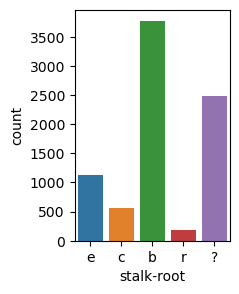


__________________________________________________

column index 12 feature name: stalk-surface-above-ring
it has 4 values and they are ['s' 'f' 'k' 'y'] and their counts of values in columns are
s    5176
k    2372
f     552
y      24
Name: stalk-surface-above-ring, dtype: int64


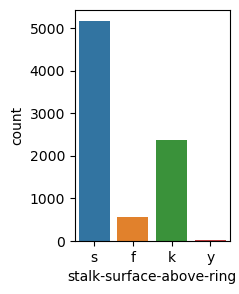


__________________________________________________

column index 13 feature name: stalk-surface-below-ring
it has 4 values and they are ['s' 'f' 'y' 'k'] and their counts of values in columns are
s    4936
k    2304
f     600
y     284
Name: stalk-surface-below-ring, dtype: int64


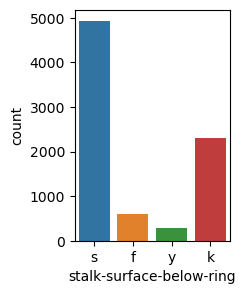


__________________________________________________

column index 14 feature name: stalk-color-above-ring
it has 9 values and they are ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y'] and their counts of values in columns are
w    4464
p    1872
g     576
n     448
b     432
o     192
e      96
c      36
y       8
Name: stalk-color-above-ring, dtype: int64


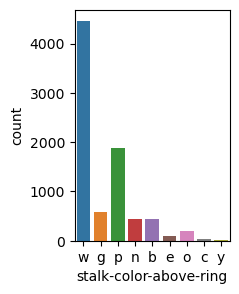


__________________________________________________

column index 15 feature name: stalk-color-below-ring
it has 9 values and they are ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c'] and their counts of values in columns are
w    4384
p    1872
g     576
n     512
b     432
o     192
e      96
c      36
y      24
Name: stalk-color-below-ring, dtype: int64


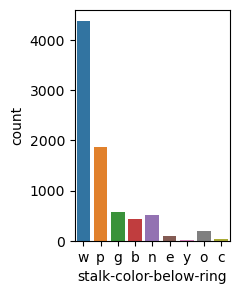


__________________________________________________

column index 16 feature name: veil-type
it has 1 values and they are ['p'] and their counts of values in columns are
p    8124
Name: veil-type, dtype: int64


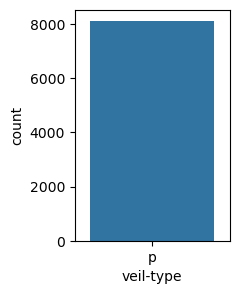


__________________________________________________

column index 17 feature name: veil-color
it has 4 values and they are ['w' 'n' 'o' 'y'] and their counts of values in columns are
w    7924
n      96
o      96
y       8
Name: veil-color, dtype: int64


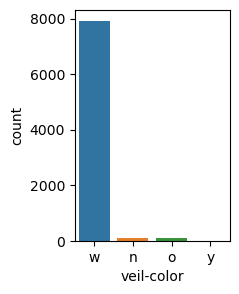


__________________________________________________

column index 18 feature name: ring-number
it has 3 values and they are ['o' 't' 'n'] and their counts of values in columns are
o    7488
t     600
n      36
Name: ring-number, dtype: int64


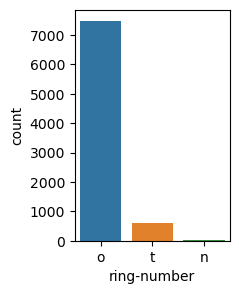


__________________________________________________

column index 19 feature name: ring-type
it has 5 values and they are ['p' 'e' 'l' 'f' 'n'] and their counts of values in columns are
p    3968
e    2776
l    1296
f      48
n      36
Name: ring-type, dtype: int64


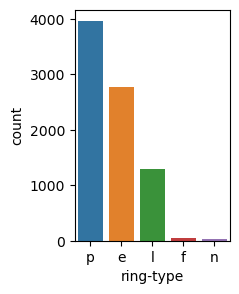


__________________________________________________

column index 20 feature name: spore-print-color
it has 9 values and they are ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b'] and their counts of values in columns are
w    2388
n    1968
k    1872
h    1632
r      72
u      48
o      48
y      48
b      48
Name: spore-print-color, dtype: int64


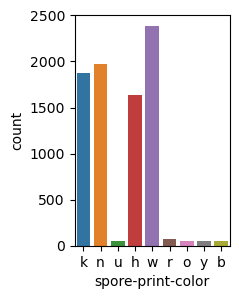


__________________________________________________

column index 21 feature name: population
it has 6 values and they are ['s' 'n' 'a' 'v' 'y' 'c'] and their counts of values in columns are
v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: population, dtype: int64


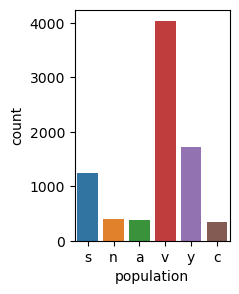


__________________________________________________

column index 22 feature name: habitat
it has 7 values and they are ['u' 'g' 'm' 'd' 'p' 'w' 'l'] and their counts of values in columns are
d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: habitat, dtype: int64


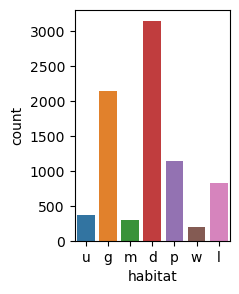

In [129]:
# describing the column with unique value and value counts and count plot

for index,column in  enumerate(df.columns) :
    n_unique=df[column].nunique()
    v_unique=df[column].unique()
    list_unique=df[column].value_counts()
    print("_" * 50)
    print("")
    print(f"column index {index} feature name: {column}")
    print(f"it has {n_unique} values and they are {v_unique} and their counts of values in columns are" )
    print(list_unique)
    plt.figure(figsize=(2,3))
    sns.countplot(data=df,x=column)
    plt.show()
    print("")
    

# 3. ENCODING 

In [111]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [112]:
encoder=LabelEncoder()

In [113]:
# creating an empty dataframe for inputing encoded data
df_encoded=pd.DataFrame()
df_encoded

""


In [114]:

for column in df.columns :
    encoded_array=encoder.fit_transform(df[column])      # encoding the column
    df_encoded[column]=encoded_array                     # inserting encoded data into new dataframe
    mapped_dict= {index:label for index,label in enumerate(encoder.classes_)}
    print("_" * 50)
    print(f"feature name {column}  its mapping {mapped_dict}")
                                         
    

________________________________________________________________________________________________________________________
feature name class  its mapping {0: 'e', 1: 'p'}
________________________________________________________________________________________________________________________
feature name cap-shape  its mapping {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'}
________________________________________________________________________________________________________________________
feature name cap-surface  its mapping {0: 'f', 1: 'g', 2: 's', 3: 'y'}
________________________________________________________________________________________________________________________
feature name cap-color  its mapping {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'p', 6: 'r', 7: 'u', 8: 'w', 9: 'y'}
________________________________________________________________________________________________________________________
feature name bruises  its mapping {0: 'f', 1: 't'}
______________________

In [115]:
df_encoded.head()   

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [116]:
df_encoded.shape

(8124, 23)

# 4. Scaling

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
X=df_encoded.iloc[:,1:]
Y=df_encoded["class"]


In [119]:

scaler = StandardScaler()
df_scaler_X = pd.DataFrame()

for column in X.columns:
    scaler_array = scaler.fit_transform(X[[column]])  # Using double brackets to maintain DataFrame structure
    df_scaler_X[column] = scaler_array.flatten()                  # Assigning scaled array to df_scaler with column name fltten used to covert 2darray to d

In [120]:
df_scaler_X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730


# 5.Model creation and evaluation

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC



from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [122]:
X_train,X_test,y_train,y_test = train_test_split(df_scaler_X,Y,random_state=100,test_size=.20)

logistic regression

In [137]:
model_lg=LogisticRegression()
model_lg.fit(X_train,y_train)
y_pred=model_lg.predict(X_test)
accuracy_score(y_test,y_pred)


0.9544615384615385

In [125]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.95      0.96      0.96       826\n           1       0.96      0.95      0.95       799\n\n    accuracy                           0.95      1625\n   macro avg       0.95      0.95      0.95      1625\nweighted avg       0.95      0.95      0.95      1625\n'

In [126]:
confusion_matrix(y_test,y_pred)

array([[795,  31],
       [ 43, 756]], dtype=int64)

Decision tree clasifier

In [159]:

model_dtc=DecisionTreeClassifier(max_depth= 50, min_samples_leaf=10, min_samples_split= 20)

model_dtc.fit(X_train,y_train)
y_pred=model_dtc.predict(X_test)
accuracy_score(y_test,y_pred)

0.9963076923076923

In [147]:
params = {
    'max_depth': [None, 3, 5, 7],
    'min_samples_leaf': [1, 2, 5, 10],
    'min_samples_split': [2, 5, 10,15,50],
    
}

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(model_dtc, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [142]:
confusion_matrix(y_test,y_pred)

array([[826,   0],
       [  0, 799]], dtype=int64)

SVC

In [164]:
model_svc = SVC(kernel='linear', C=1.0)
model_svc.fit(X_train,y_train)
y_pred=model_svc.predict(X_test)
accuracy_score(y_test,y_pred)

0.9932307692307693